In [2]:
# %pip install seaborn ncps
# %pip install imgaug

In [3]:
import numpy as np
import os
from tensorflow import keras
from ncps import wirings
from ncps.tf import LTC
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random
import warnings

In [5]:
datadir = '/mnt/c/Users/91961/LNN_CFC_behaviour_cloning/archive'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, '/mnt/c/Users/91961/LNN_CFC_behaviour_cloning/archive/driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', None)
data.head()

center  \
0  C:\Users\91961\Downloads\simulator-windows-64\IMG\center_2024_06_16_16_53_42_294.jpg   
1  C:\Users\91961\Downloads\simulator-windows-64\IMG\center_2024_06_16_16_53_42_411.jpg   
2  C:\Users\91961\Downloads\simulator-windows-64\IMG\center_2024_06_16_16_53_42_528.jpg   
3  C:\Users\91961\Downloads\simulator-windows-64\IMG\center_2024_06_16_16_53_42_666.jpg   
4  C:\Users\91961\Downloads\simulator-windows-64\IMG\center_2024_06_16_16_53_42_791.jpg   

                                                                                  left  \
0   C:\Users\91961\Downloads\simulator-windows-64\IMG\left_2024_06_16_16_53_42_294.jpg   
1   C:\Users\91961\Downloads\simulator-windows-64\IMG\left_2024_06_16_16_53_42_411.jpg   
2   C:\Users\91961\Downloads\simulator-windows-64\IMG\left_2024_06_16_16_53_42_528.jpg   
3   C:\Users\91961\Downloads\simulator-windows-64\IMG\left_2024_06_16_16_53_42_666.jpg   
4   C:\Users\91961\Downloads\simulator-windows-64\IMG\left_2024_06_16_16_53_42_791.jpg   

                                                                                  right  \
0   C:\Users\91961\Downloads\simulator-windows-64\IMG\right_2024_06_16_16_53_42_294.jpg   
1   C:\Users\91961\Downloads\simulator-windows-64\IMG\right_2024_06_16_16_53_42_411.jpg   
2   C:\Users\91961\Downloads\simulator-windows-64\IMG\right_2024_06_16_16_53_42_528.jpg   
3   C:\Users\91961\Downloads\simulator-windows-64\IMG\right_2024_06_16_16_53_42_666.jpg   
4   C:\Users\91961\Downloads\simulator-windows-64\IMG\right_2024_06_16_16_53_42_791.jpg   

   steering  throttle  reverse      speed  
0       0.0       0.0      0.0  10.072850  
1       0.0       0.0      0.0  10.035960  
2       0.0       0.0      0.0  10.004120  
3       0.0       0.0      0.0   9.972794  
4       0.0       0.0      0.0   9.949432

In [6]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

center                              left  \
0  center_2024_06_16_16_53_42_294.jpg  left_2024_06_16_16_53_42_294.jpg   
1  center_2024_06_16_16_53_42_411.jpg  left_2024_06_16_16_53_42_411.jpg   
2  center_2024_06_16_16_53_42_528.jpg  left_2024_06_16_16_53_42_528.jpg   
3  center_2024_06_16_16_53_42_666.jpg  left_2024_06_16_16_53_42_666.jpg   
4  center_2024_06_16_16_53_42_791.jpg  left_2024_06_16_16_53_42_791.jpg   

                               right  steering  throttle  reverse      speed  
0  right_2024_06_16_16_53_42_294.jpg       0.0       0.0      0.0  10.072850  
1  right_2024_06_16_16_53_42_411.jpg       0.0       0.0      0.0  10.035960  
2  right_2024_06_16_16_53_42_528.jpg       0.0       0.0      0.0  10.004120  
3  right_2024_06_16_16_53_42_666.jpg       0.0       0.0      0.0   9.972794  
4  right_2024_06_16_16_53_42_791.jpg       0.0       0.0      0.0   9.949432

In [7]:
num_bins = 25
samples_per_bin = 400
hist, bins = np.histogram(data['steering'], num_bins)

In [8]:
print(bins)

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


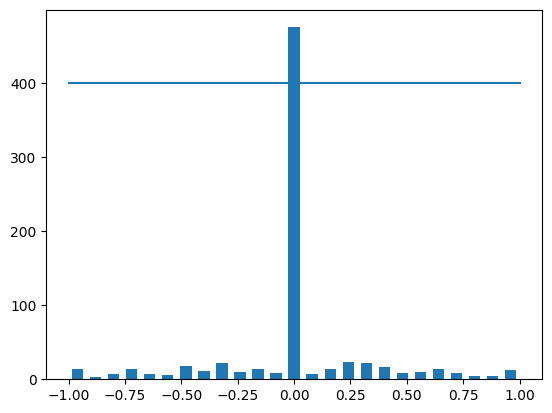

In [9]:
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), \
(samples_per_bin, samples_per_bin))

In [10]:
print('total data:', len(data))

total data: 756


In [11]:
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)
print('removed:', len(remove_list))

removed: 75


In [12]:
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

remaining: 681


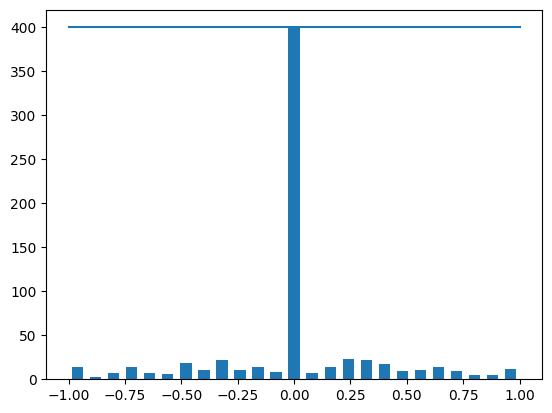

In [13]:
hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), \
(samples_per_bin, samples_per_bin))

In [14]:
print(data.iloc[1])

center      center_2024_06_16_16_53_42_666.jpg
left          left_2024_06_16_16_53_42_666.jpg
right        right_2024_06_16_16_53_42_666.jpg
steering                                   0.0
throttle                                   0.0
reverse                                    0.0
speed                                 9.972794
Name: 3, dtype: object


In [15]:
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
    # left image append
    image_path.append(os.path.join(datadir,left.strip()))
    steering.append(float(indexed_data[3])+0.15)
    # right image append
    image_path.append(os.path.join(datadir,right.strip()))
    steering.append(float(indexed_data[3])-0.15)
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings
 
image_paths, steerings = load_img_steering('/mnt/c/Users/91961/LNN_CFC_behaviour_cloning/archive/IMG', data)

/tmp/ipykernel_63206/3177412680.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
/tmp/ipykernel_63206/3177412680.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  steering.append(float(indexed_data[3]))
/tmp/ipykernel_63206/3177412680.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  steering.append(float(indexed_data[3])+0.15)
/tmp/ipykernel_63206/31774

In [37]:
print(steerings)

[ 0.    0.15 -0.15 ...  0.    0.15 -0.15]


: 

In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

print(X_train.shape)
print(y_train.shape)

Training Samples: 1634
Valid Samples: 409
(1634,)
(1634,)


Text(0.5, 1.0, 'Validation set')

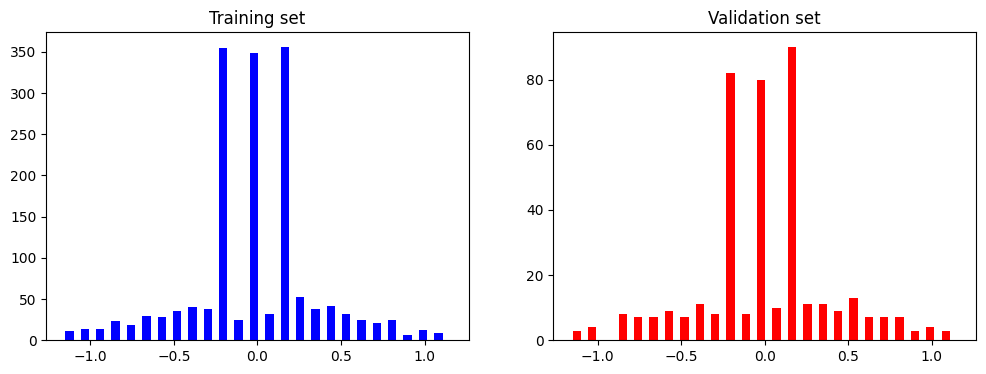

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

Text(0.5, 1.0, 'Zoomed Image')

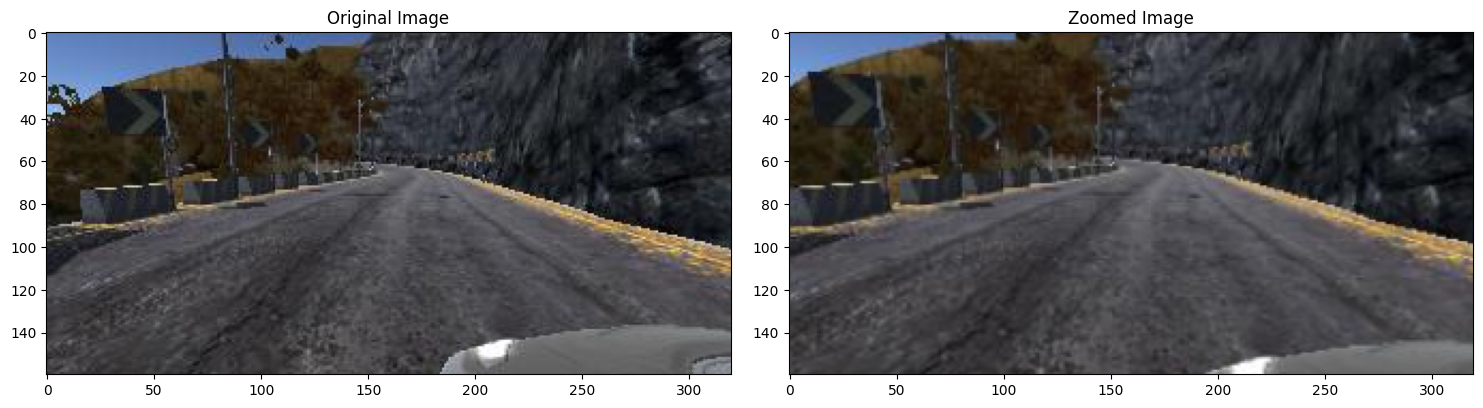

In [18]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image
image = image_paths[random.randint(0, 2270)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

Text(0.5, 1.0, 'Panned Image')

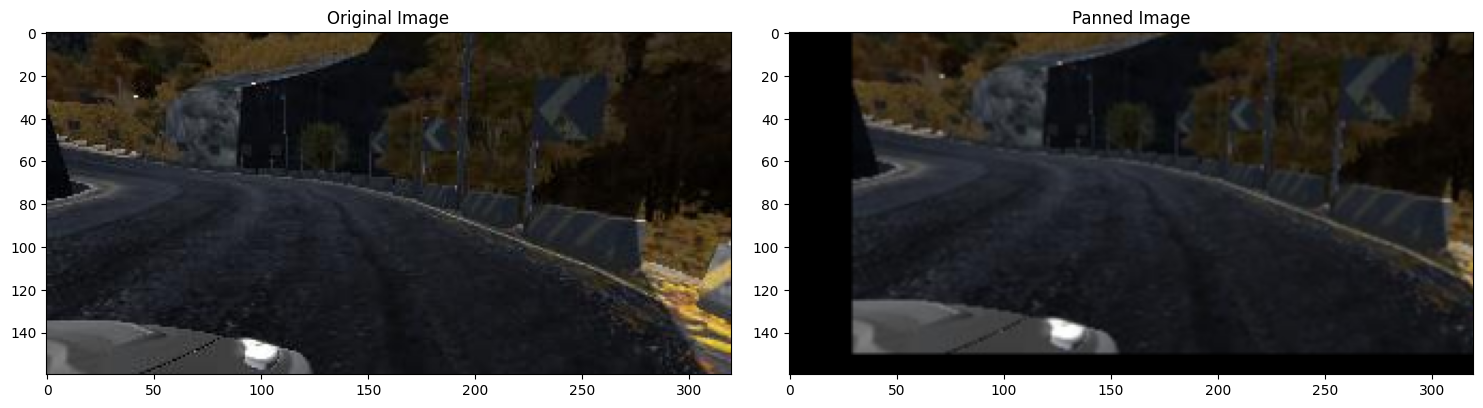

In [19]:
def pan(image):
  pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image
image = image_paths[random.randint(0, 2)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

Text(0.5, 1.0, 'Brightness altered image ')

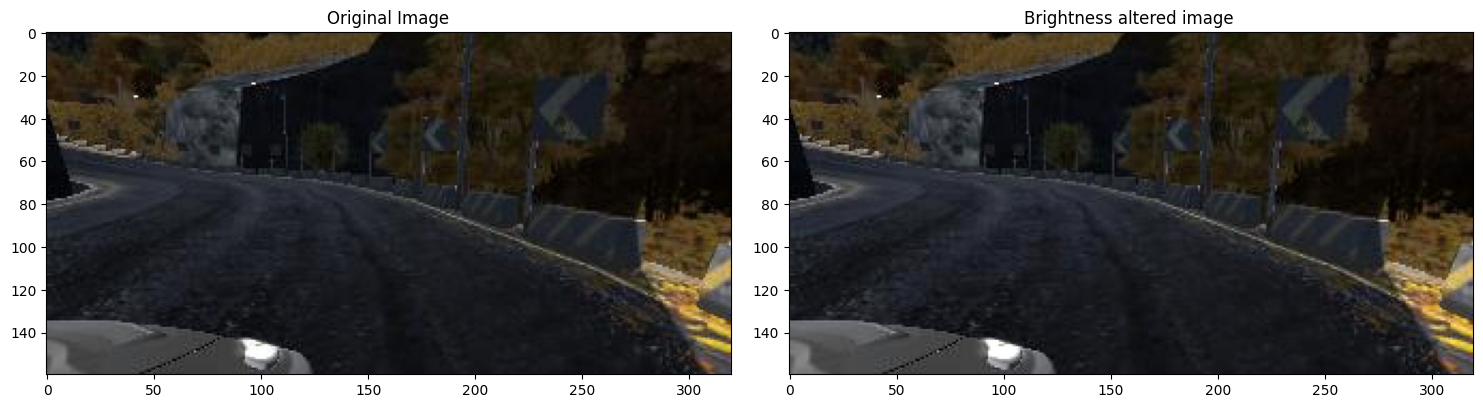

In [20]:
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image
image = image_paths[random.randint(0, 2)]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness altered image ')

Text(0.5, 1.0, 'Flipped Image - Steering Angle:-0.0')

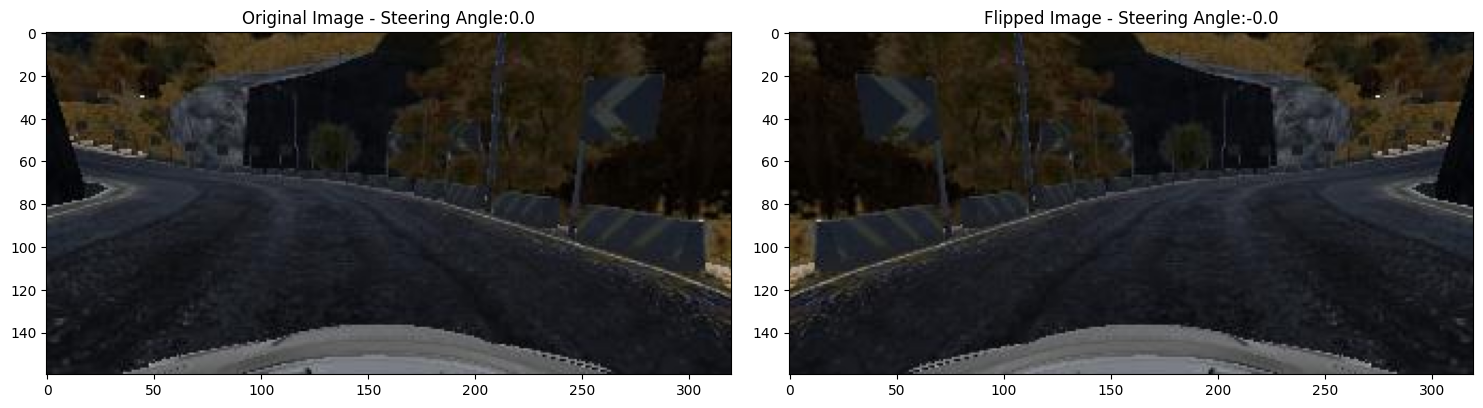

In [21]:
def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1)
    steering_angle = -steering_angle
    return image, steering_angle
random_index = random.randint(0, 2)
image = image_paths[random_index]
steering_angle = steerings[random_index]
 
 
original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle))
 
axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image - ' + 'Steering Angle:' + str(flipped_steering_angle))

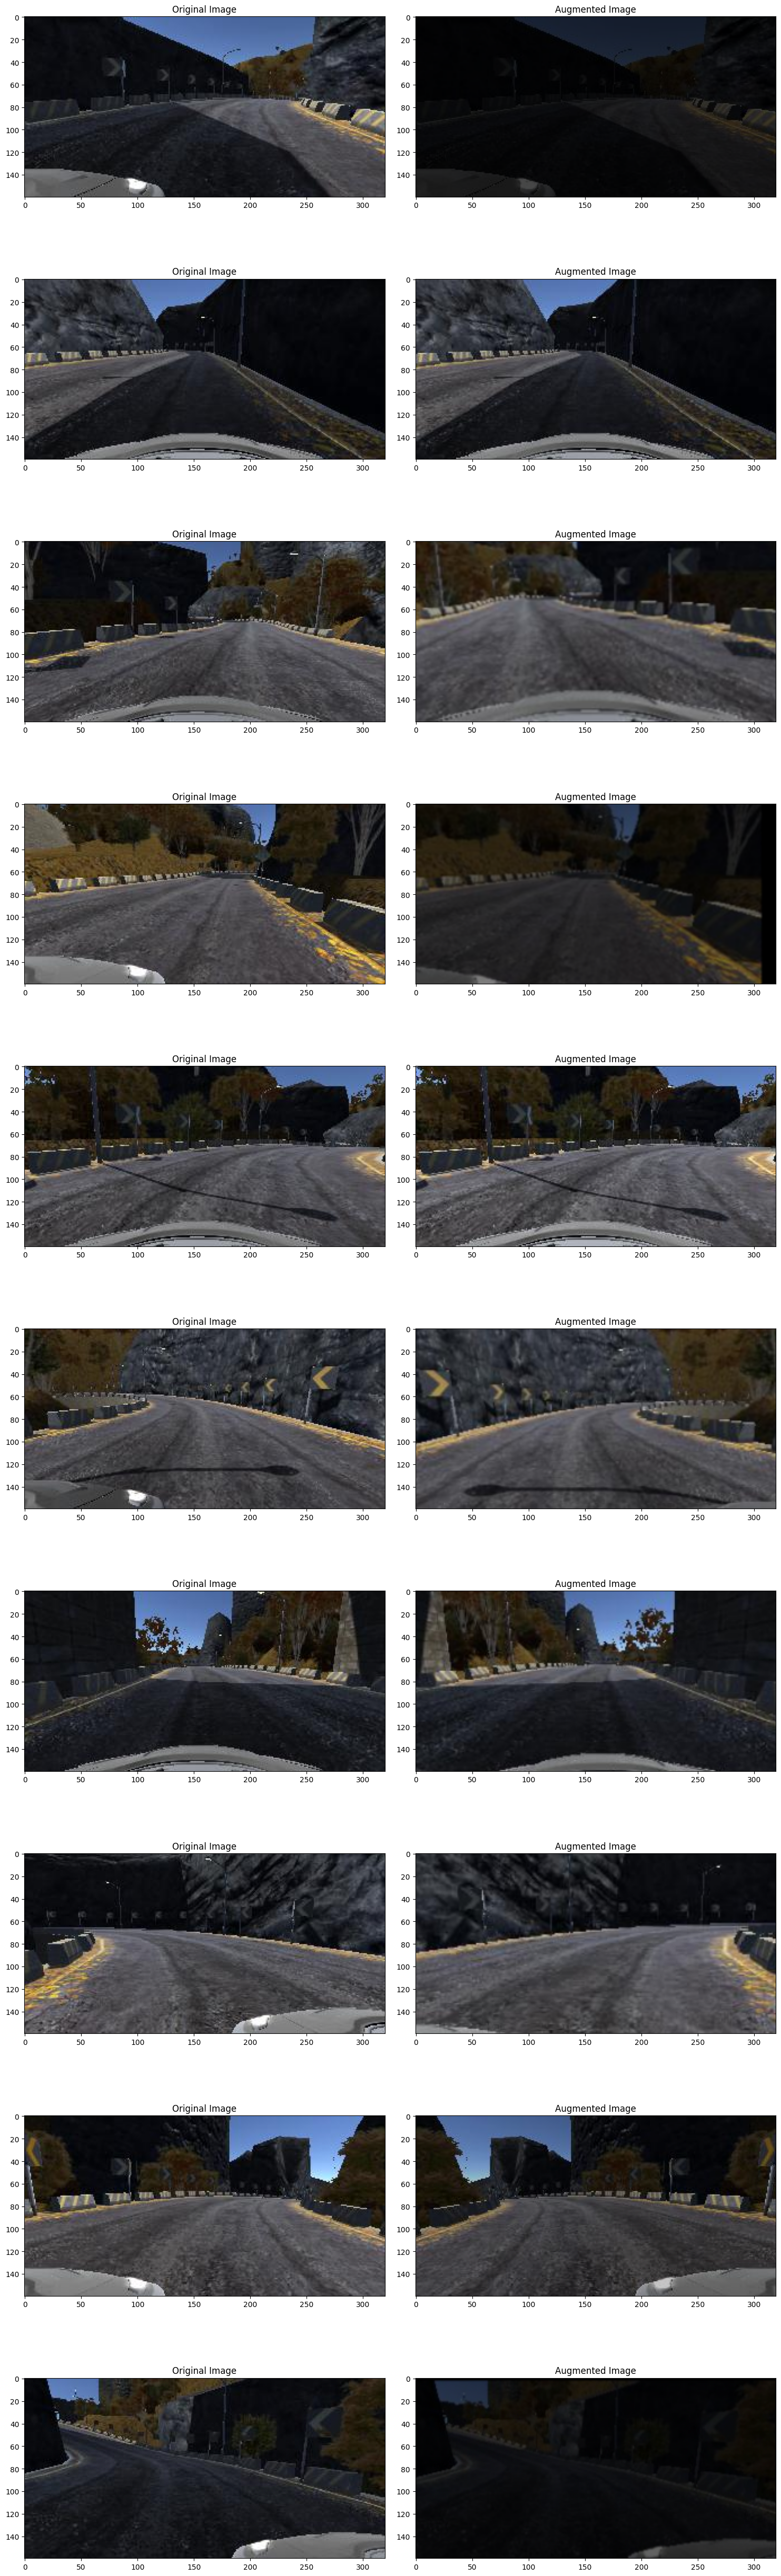

In [22]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
      image = pan(image)
    if np.random.rand() < 0.5:
      image = zoom(image)
    if np.random.rand() < 0.5:
      image = img_random_brightness(image)
    if np.random.rand() < 0.5:
      image, steering_angle = img_random_flip(image, steering_angle)
    
    return image, steering_angle
ncol = 2
nrow = 10
 
fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()
 
for i in range(10):
  randnum = random.randint(0, len(image_paths) - 1)
  random_image = image_paths[randnum]
  random_steering = steerings[randnum]
    
  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)
  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original Image")
  
  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented Image")

Text(0.5, 1.0, 'Preprocessed Image')

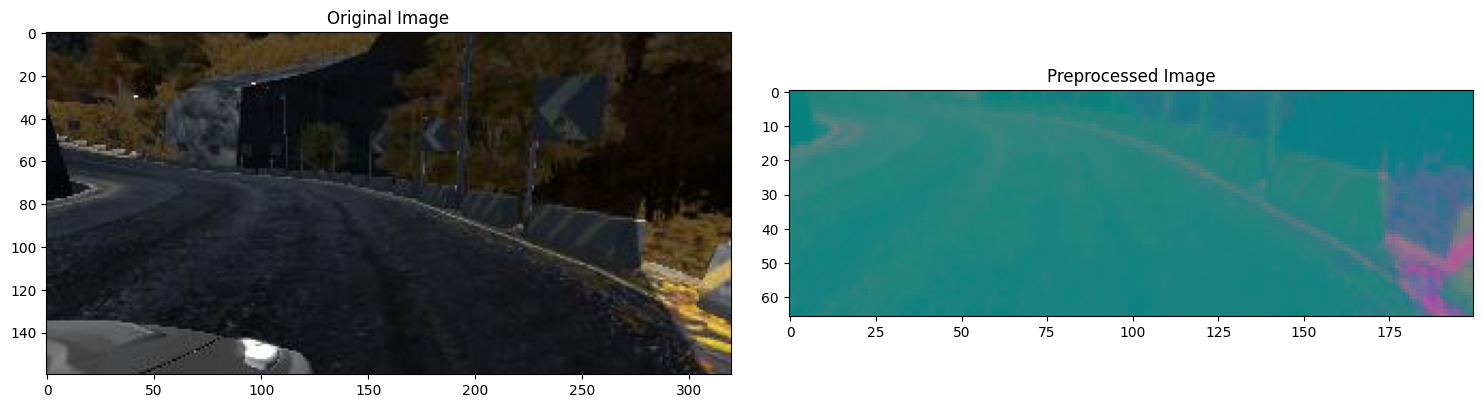

In [23]:
def img_preprocess(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img
image = image_paths[2]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

Text(0.5, 1.0, 'Preprocessed Image')

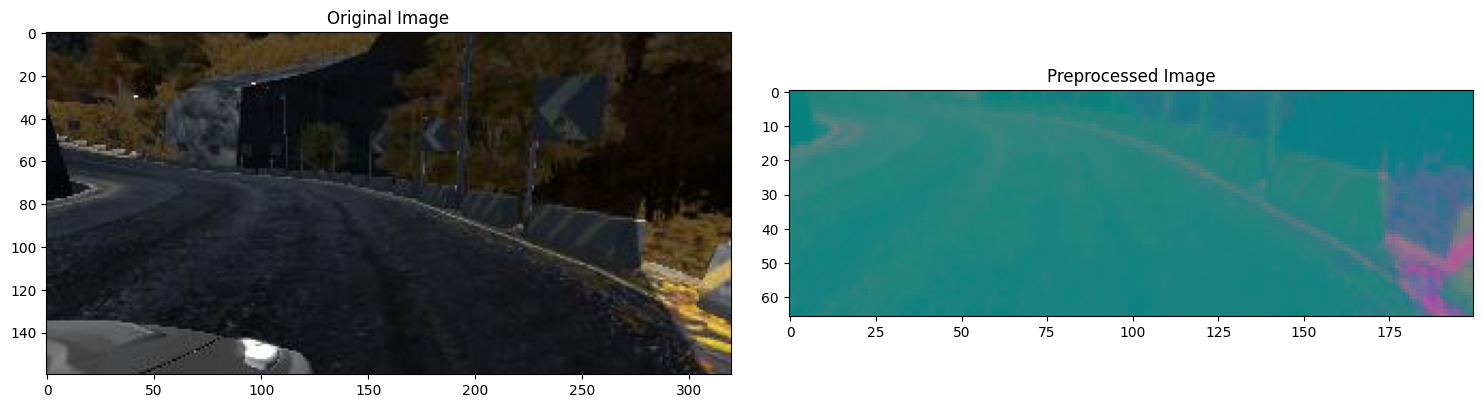

In [24]:
image = image_paths[2]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

In [25]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
  
  while True:
    batch_img = []
    batch_steering = []
    
    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)
      
      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
     
      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]
      
      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering))

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, TimeDistributed
from tensorflow.keras.optimizers import Adam
from ncps.tf import LTC

def modifiedNvidiaModel(n_actions, units=4, mixed_memory=False, go_backwards=False, stateful=False, ode_unfolds=6):
    model = tf.keras.Sequential()
    
    # Wrap each Conv2D layer with TimeDistributed
    model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(24, (5, 5), strides=(2, 2), activation="elu"), input_shape=(1, 66, 200, 3)))
    model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(36, (5, 5), strides=(2, 2), activation="elu")))
    model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(48, (5, 5), strides=(2, 2), activation="elu")))
    model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(64, (3, 3), activation="elu")))
    model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(64, (3, 3), activation="elu")))
    model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5)))
    
    model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten()))
    
    model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(100, activation="elu")))
    model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5)))
    
    model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(50, activation="elu")))
    model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5)))
    
    model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(10, activation="elu")))
    model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5)))
    
    # Add LTC layer (assuming LTC is from ncps.tf)
    model.add(LTC(units=units, mixed_memory=mixed_memory, go_backwards=go_backwards, stateful=stateful, ode_unfolds=ode_unfolds, return_sequences=False, return_state=False))
    
    # Final Dense layer
    model.add(tf.keras.layers.Dense(n_actions))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-3), loss="mse")
    
    return model

# Example usage
model = modifiedNvidiaModel(n_actions=1, units=4, mixed_memory=False, go_backwards=False, stateful=False, ode_unfolds=6)

# Print model summary
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, 1, 31, 98, 24)     1824      
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 1, 14, 47, 36)     21636     
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, 1, 5, 22, 48)      43248     
 stributed)                                                      
                                                                 
 time_distributed_3 (TimeDi  (None, 1, 3, 20, 64)      27712     
 stributed)                                                      
                                                                 
 time_distributed_4 (TimeDi  (None, 1, 1, 18, 64)      3

In [27]:
from tensorflow.keras.utils import Sequence
# Custom Data Generator
class CustomDataGenerator(Sequence):
    def __init__(self, image_paths, steerings, batch_size, istraining):
        self.image_paths = image_paths
        self.steerings = steerings
        self.batch_size = batch_size
        self.istraining = istraining
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.image_paths) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]

        batch_img = []
        batch_steering = []

        for i in indexes:
            if self.istraining:
                im, steering = random_augment(self.image_paths[i], self.steerings[i])
            else:
                im = mpimg.imread(self.image_paths[i])
                steering = self.steerings[i]

            im = img_preprocess(im)
            batch_img.append(im)
            batch_steering.append(steering)

        # Convert lists to arrays
        batch_img = np.array(batch_img)
        batch_steering = np.array(batch_steering)
        
        # Add time dimension to input images
        batch_img = np.expand_dims(batch_img, axis=1)  # Shape will be (batch_size, 1, height, width, channels)

        return batch_img, batch_steering

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.image_paths))
        if self.istraining:
            np.random.shuffle(self.indexes)


In [28]:
# %pip install tqdm

In [29]:
from tqdm import tqdm

# Assuming you have defined train_generator and valid_generator as CustomDataGenerator instances
train_generator = CustomDataGenerator(X_train, y_train, batch_size=100, istraining=True)
valid_generator = CustomDataGenerator(X_valid, y_valid, batch_size=100, istraining=False)

# Determine number of steps per epoch and validation steps
steps_per_epoch = len(X_train) // 100
validation_steps = len(X_valid) // 100

# Initialize tqdm instances for progress bars
train_progress = tqdm(train_generator, total=steps_per_epoch, desc='Training')
valid_progress = tqdm(valid_generator, total=validation_steps, desc='Validation')

# Fit the model using the original generators, not tqdm wrapped instances
history = model.fit(train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=5,
                    validation_data=valid_generator,
                    validation_steps=validation_steps,
                    verbose=1,
                    shuffle=True)

# Close tqdm instances after training
train_progress.close()
valid_progress.close()


Training:   0%|          | 0/16 [00:00<?, ?it/s]


Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/5


2024-06-16 18:05:14.023587: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-06-16 18:05:22.224386: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f1da196cb70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-16 18:05:22.224453: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-06-16 18:05:22.279202: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1718541322.544565   63643 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


16/16 [==============================] - 39s 1s/step - loss: 0.1783 - val_loss: 0.1513
Epoch 2/5
16/16 [==============================] - 15s 915ms/step - loss: 0.1478 - val_loss: 0.1588
Epoch 3/5
16/16 [==============================] - 13s 775ms/step - loss: 0.1431 - val_loss: 0.1517
Epoch 4/5
16/16 [==============================] - 13s 841ms/step - loss: 0.1443 - val_loss: 0.1502
Epoch 5/5
16/16 [==============================] - 14s 905ms/step - loss: 0.1415 - val_loss: 0.1498


Validation:   0%|          | 0/4 [01:35<?, ?it/s]


In [30]:
model.save('/mnt/c/Users/91961/LNN_CFC_behaviour_cloning/self_drive.h5')

/home/pdt/miniconda3/envs/tanna/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
y_pred = model.predict(valid_generator)


4/4 [==============================] - 3s 523ms/step


In [32]:
# print(y_pred)

print(len(y_pred))
print(len(X_valid))
print(len(y_valid))

400
409
409


In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Generate predictions using the model and the generator
y_pred = []
y_true = []

for i in range(len(valid_generator)):
    batch_x, batch_y = valid_generator[i]
    batch_pred = model.predict(batch_x)
    y_pred.append(batch_pred)
    y_true.append(batch_y)

# Concatenate predictions and true labels
y_pred = np.concatenate(y_pred, axis=0)[:400]  # Assuming y_pred has 400 entries
y_true = np.concatenate(y_true, axis=0)[:400]  # Assuming y_true also has 400 entries

# Calculate regression metrics
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")

4/4 [==============================] - 0s 34ms/step
Mean Squared Error (MSE): 0.1498
Mean Absolute Error (MAE): 0.2735
R^2 Score: 0.0001
